# DAL Assignment 1 - 2023

## Exploratory Data Analysis



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd '/content/drive/MyDrive/assignment1dalfiles'

/content/drive/MyDrive/assignment1dalfiles


In [6]:
# Read dataset
dataset = pd.read_excel('merged_data.xlsx')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3134 non-null   int64  
 1   State              3134 non-null   object 
 2   AreaName           3134 non-null   object 
 3   All_Poverty        3134 non-null   int64  
 4   M_Poverty          3134 non-null   int64  
 5   F_Poverty          3134 non-null   int64  
 6   FIPS               3134 non-null   int64  
 7   Med_Income         3133 non-null   float64
 8   Med_Income_White   3132 non-null   float64
 9   Med_Income_Black   1924 non-null   float64
 10  Med_Income_Nat_Am  1474 non-null   float64
 11  Med_Income_Asian   1377 non-null   float64
 12  Hispanic           2453 non-null   float64
 13  M_With             3134 non-null   int64  
 14  M_Without          3134 non-null   int64  
 15  F_With             3134 non-null   int64  
 16  F_Without          3134 

In [7]:
dataset.head()

,Unnamed: 0,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,...,F_Without,All_With,All_Without,fips_x,Incidence_Rate,Avg_Ann_Incidence,recent_trend,fips_y,Mortality_Rate,Avg_Ann_Deaths
0,0,AK,"Aleutians East Borough, Alaska",553,334,219,2013,61518.0,72639.0,31250.0,...,540,1442,1857,2013,*,3 or fewer,*,2013,*,*
1,1,AK,"Aleutians West Census Area, Alaska",499,273,226,2016,84306.0,97321.0,93750.0,...,564,4177,1333,2016,*,3 or fewer,*,2016,*,*
2,2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,2020,78326.0,87235.0,50535.0,...,21393,243173,44638,2020,61.5,131,stable,2020,47.3,96
3,3,AK,"Bethel Census Area, Alaska",4364,2199,2165,2050,51012.0,92647.0,73661.0,...,1774,13023,4482,2050,62.7,6,stable,2050,58.3,5
4,4,AK,"Bristol Bay Borough, Alaska",69,33,36,2060,79750.0,88000.0,NaN,...,67,768,191,2060,*,3 or fewer,*,2060,*,*


In [8]:
# Finding number of invalid entries in each attribute
len(dataset) - dataset.count()

Unnamed: 0              0
State                   0
AreaName                0
All_Poverty             0
M_Poverty               0
F_Poverty               0
FIPS                    0
Med_Income              1
Med_Income_White        2
Med_Income_Black     1210
Med_Income_Nat_Am    1660
Med_Income_Asian     1757
Hispanic              681
M_With                  0
M_Without               0
F_With                  0
F_Without               0
All_With                0
All_Without             0
fips_x                  0
Incidence_Rate          0
Avg_Ann_Incidence       0
recent_trend            0
fips_y                  0
Mortality_Rate          0
Avg_Ann_Deaths          0
dtype: int64

From the dataset, we can exclude certain attributes that don't provide meaningful information for our analysis. These attributes include Unnamed, State, and AreaName. It's important to note that some cells containing special characters like "*", "\_" or "__" may not be correctly recognized as null entries, and we should address them seperately during data cleaning.

## Visualisation

In [9]:
# Making a dataset copy helps us to retrive the original data in case of any mistakes occuring during cleaning and other processes
cancer = dataset.copy()

It is visible that M_Poverty and F_Poverty in each row add up to All_Poverty. We shall verify this just in case.

Hypothesis: 'All_Poverty' are values equal to 'M_Poverty' + 'F_Poverty': True 



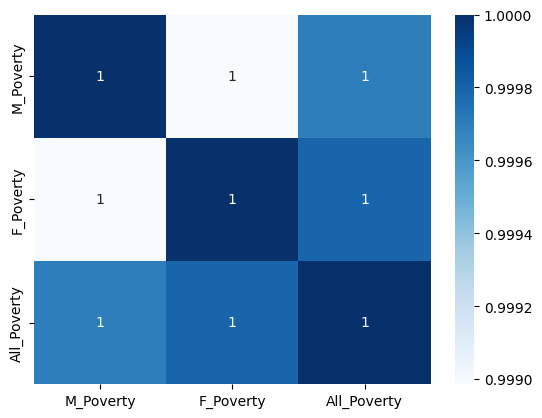

In [10]:
poverty_equality = not sum(cancer['All_Poverty'] != (cancer['M_Poverty'] + cancer['F_Poverty']))
print("Hypothesis: 'All_Poverty' are values equal to 'M_Poverty' + 'F_Poverty':", poverty_equality, '\n')

# Select specific columns related to poverty and calculate their correlation
cols = ['M_Poverty', 'F_Poverty', 'All_Poverty']
poverty_data = cancer[cols].corr()

# Print the correlation between 'All_Poverty' with 'M_Poverty' and 'F_Poverty'
dataplot = sns.heatmap(poverty_data, cmap="Blues", annot=True)
plt.show()

The above ouptut tells us that All_Poverty, M_Poverty, and F_Poverty are strongly correlated.

Now we shall evaluate health insurance feature.

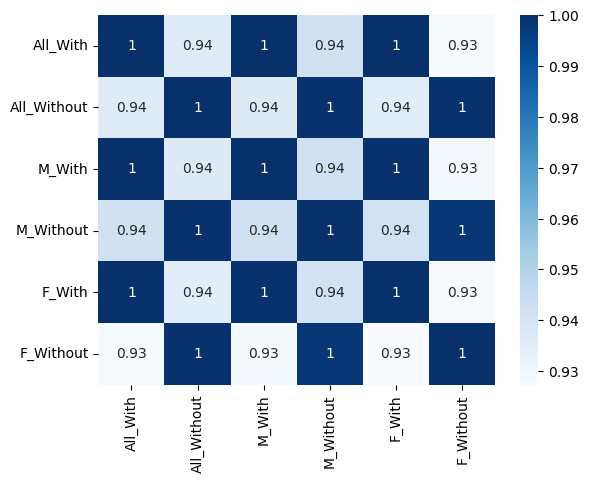

In [11]:
cols = ['All_With','All_Without','M_With','M_Without','F_With','F_Without']
data = cancer[cols].corr()

# plotting correlation heatmap
dataplot = sns.heatmap(data, cmap="Blues", annot=True)
plt.show()

These findings suggest a strong correlation among these columns. Notably, 'All_With' exhibits an almost perfect correlation with 'M_With' and 'F_With,' while 'All_Without' shows a similar near-perfect correlation with 'M_Without' and 'F_Without.' This observation aligns with the idea that the total population with insurance is inherently linked to both male and female populations who possess insurance.

Now let us visualise the correlation between 'Med_Income' and income-related attributes for different racial groups, such as 'Med_Income_White,' 'Med_Income_Black,' 'Med_Income_Nat_Am,' 'Med_Income_Asian,' and 'Hispanic.' We can use a heatmap for this.

Correlation between 'Med_Income' with 'Med_Income','Med_Income_White','Med_Income_Black','Med_Income_Nat_Am','Med_Income_Asian','Hispanic'


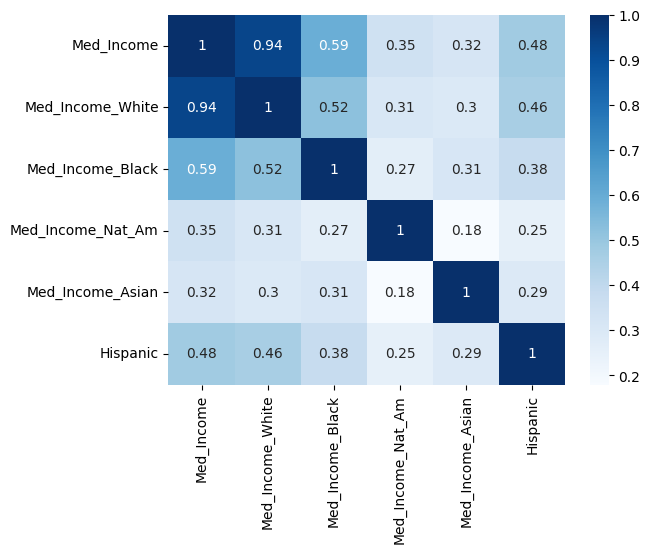

In [13]:
print("Correlation between 'Med_Income' with 'Med_Income','Med_Income_White','Med_Income_Black','Med_Income_Nat_Am','Med_Income_Asian','Hispanic'")
cols = ['Med_Income','Med_Income_White','Med_Income_Black','Med_Income_Nat_Am','Med_Income_Asian','Hispanic']
income_data = cancer[cols].corr()
dataplot = sns.heatmap(income_data, cmap="Blues", annot=True)
plt.show()


A notable correlation exists between 'Median White Income' and 'Median Income.' The relatively weak relationships observed between 'Median Income' and the remaining 'Median Income' attributes may stem from significant missing data in those fields. Given that our analysis should not focus solely on a single racial group, it is advisable to remove all ethnicity-related columns from our dataset.

The FIPS, fips_x, and fips_y values serve as distinct identifiers for various counties and do not contribute to our analysis. Therefore, they can be omitted from our dataset.

**Mortality Rate**

The 'Mortality Rate' is our target variable, which we aim to predict using our linear regression model. As depicted in the graph below, it follows a skewed normal distribution pattern.

To maintain the integrity of our analysis and ensure that uncertain data does not interfere, I've remmoved rows containing '*' symbols in the 'Mortality_rate' attribute instead of attempting to defining unreliable values for these rows.

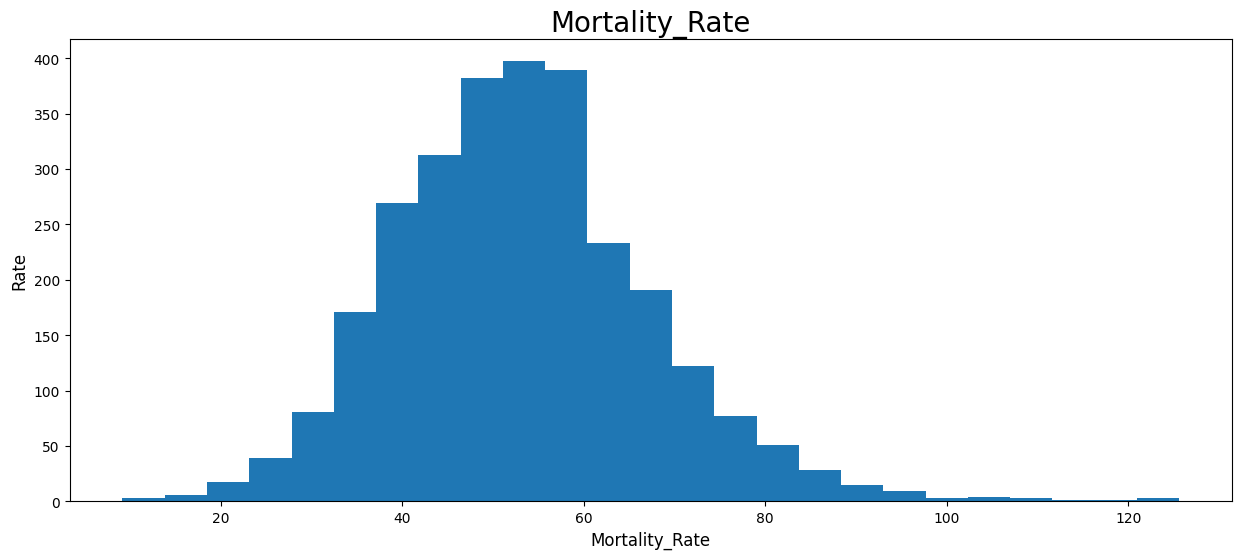

In [14]:
cancer['Mortality_Rate'][cancer['Mortality_Rate']!='*'].hist(bins=25,figsize = (15,6))
plt.xlabel("Mortality_Rate", fontsize=12)
plt.ylabel("Rate", fontsize=12)
cancer_new = cancer[cancer['Mortality_Rate']!='*']
plt.title('Mortality_Rate', fontsize=20)
plt. grid(False)
plt.savefig('Mortality_Rate')
plt.show()

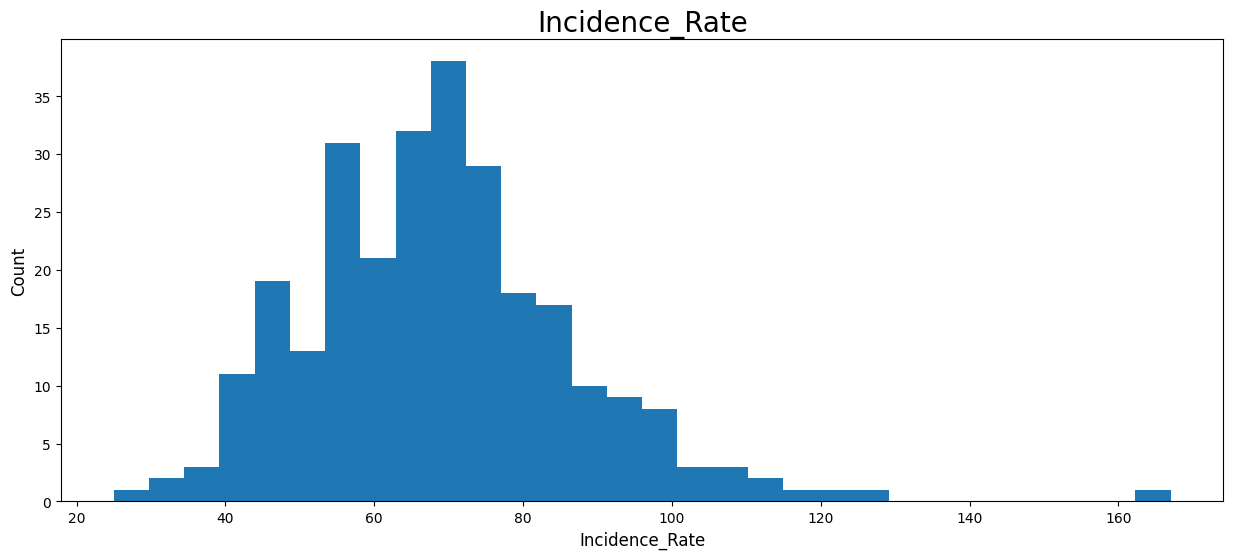

In [15]:
cancer['Incidence_Rate'] = cancer['Incidence_Rate'].astype("string")
cancer['Incidence_Rate'][cancer['Incidence_Rate'].str.isnumeric()].astype("float").hist(bins=30, figsize = (15,6))
plt.xlabel("Incidence_Rate", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Incidence_Rate", fontsize=20)
plt. grid(False)
plt.savefig("Incidence_Rate")
plt.show()

Recent Trends of cancer Incidence Data

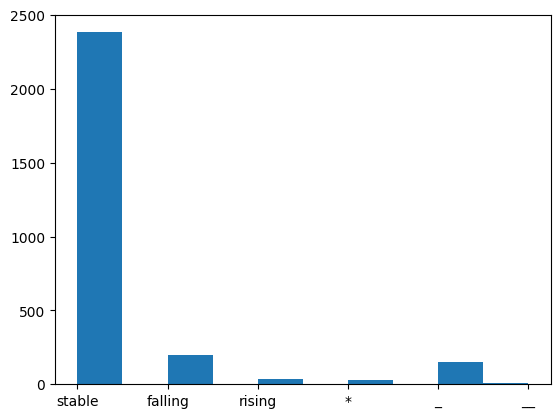

In [16]:
cancer_new['recent_trend'].hist()
plt. grid(False)
plt.show()

The attribute "Recent Trend" represents a categorical description of the cancer incidence trend over the past 5 years. While it gives a sense of potential cancer likelihood, it is not a definitive indicator of cancer incidence. The trend is influenced by a range of external factors and lacks clarity for in-depth analysis without supplementary information. Given that this data pertains to 2017 and earlier, this attribute does not add much value to our analysis.

## Data Transformation and Cleaning

In [17]:
dropcols = ['Unnamed: 0','State','AreaName','FIPS','fips_x','fips_y','Avg_Ann_Deaths','recent_trend',]
cancer_new.drop(dropcols, axis=1, inplace=True)
cancer_new = cancer_new[cancer_new['Mortality_Rate']!='*']
cancer_new['Incidence_Rate'] = cancer_new['Incidence_Rate'].replace({'\#':''}, regex = True)
cancer_new = cancer_new[cancer_new['Incidence_Rate']!='*']
cancer_new = cancer_new[cancer_new['Incidence_Rate']!='_']
cancer_new = cancer_new[cancer_new['Incidence_Rate']!='__']
cancer_new.shape

<ipython-input-17-fd164dfa8274>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancer_new.drop(dropcols, axis=1, inplace=True)


(2641, 18)

In [18]:
cancer_new.reset_index(drop = True, inplace = True)
cancer_new["Mortality_Rate"] = pd.to_numeric(cancer_new["Mortality_Rate"])
cancer_new["Incidence_Rate"] = pd.to_numeric(cancer_new["Incidence_Rate"])
cancer_new["Avg_Ann_Incidence"] = pd.to_numeric(cancer_new["Avg_Ann_Incidence"])

In [19]:
# create new attribute called Insurance percentage i.e. number of people with insurance /population in county
col=['M_With','F_With','All_With']
for col_name in col:
    cancer_new[col_name+'_Percentage'] = 100*cancer_new[col_name]/(cancer_new['All_With']+cancer_new['All_Without'])

In [20]:
# create feature on poverty percentage which is number of people living under poverty/estimated population in county
# estimated population = 10^6 *'Ann_Incidence_Rate'/'Incidence_Rate'
# Reason: Incidence_rate is normalized values (for a million population) and Ann_Incidence is the total count
col=['All_Poverty','M_Poverty','F_Poverty']
for col_name in col:
    cancer_new[col_name+'_Percentage'] = 100*cancer_new[col_name]/(cancer_new['All_With']+cancer_new['All_Without'])

In [21]:
final_dataset = cancer_new.drop(['All_Poverty','M_Poverty','F_Poverty','M_With','M_Without','F_With','F_Without','All_With','All_Without','Avg_Ann_Incidence'],axis =1)

The dataset still has some missing values in the ethnicity column. The number of missing values is significant, so the ethnicity income column was dropped. It would be unfair to determine the rate based on only one ethnicity, so all ethnicities were dropped.

## Implementing Linear Regression Model

In [22]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# This function plots graph, saves them and returns model parameters, R2 scores of the function fitted

def graphingtool(X,y,xlabel_="",ylabel_="",legend1="",legend2="", title_ = None):
    lr = LinearRegression()
    X = X.reshape(-1,1)
    x = sm.add_constant(X)
    result = sm.OLS(y,x).fit()
    print(result.summary())
    lr.fit(X,y)
    m = lr.coef_[0]
    c = lr.intercept_
    return [m,c],lr.score(X,y)

The a_estimate and c_estimate are obtained via OLS Method and the plot (in pdf) seems a good fit

In [23]:
# Graphs:
xcols = {'Med_Income':'Median Income',
         'Med_Income_White':'Median Income White',
         'Med_Income_Black':'Median Income Black',
         'Med_Income_Nat_Am': 'Median Income Native Americans',
         'Med_Income_Asian':'Median Income Asian',
         'Hispanic':'Median Income Hispanic',
         'M_Poverty_Percentage':'Male Poverty (in Percent)',
         'F_Poverty_Percentage':'Female Poverty (in Percent)',
         'All_Poverty_Percentage':'Combined Poverty (in Percent)',
         'M_With_Percentage':'Male with insurance (in percent)',
         'F_With_Percentage':'Female with insurance (in percent)',
         'All_With_Percentage':'All with insurance (in percent)'
        }

ycols = ['Incidence_Rate','Mortality_Rate']

In [24]:
model_estimates = {}

for xcol,val in xcols.items():
    for ycol in ycols:
        x1 = final_dataset[xcol]
        y1 = final_dataset[ycol]
        y1 = y1[x1.notnull()]
        x1 = x1[x1.notnull()]
        data = " ".join(ycol.split('_'))
        [li,score] = graphingtool(x1.values,y1.values,xlabel_ = val,ylabel_ = data,legend1 = 'Linear Fit',
                     legend2 = data)
        model_estimates[xcol+'_'+ycol] = [li,score]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     444.8
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           2.23e-91
Time:                        07:42:59   Log-Likelihood:                -11128.
No. Observations:                2641   AIC:                         2.226e+04
Df Residuals:                    2639   BIC:                         2.227e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.0277      1.224     77.620      0.0

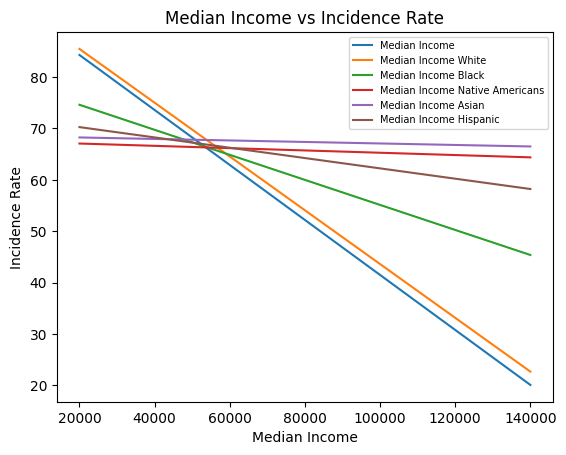

In [25]:
# Plot graph of Median Income vs Incidence Rate

li = []
for key,val in model_estimates.items():
    if ('Med_Income' in key or 'Hispanic' in key) and 'Incidence_Rate' in key:
        x = np.linspace(20000,140000)
        y = model_estimates[key][0][0]*x + model_estimates[key][0][1]
        plt.plot(x,y)
        data = key
        temp = data.split('_')
        temp = temp[:-2]
        data  = "_".join(temp)
        li.append(xcols[data])
plt.xlabel('Median Income')
plt.ylabel('Incidence Rate')
plt.legend(li,prop={'size': 7})
plt.title('Median Income vs Incidence Rate')
plt.savefig('Median Income vs Incidence Rate')
plt.show()

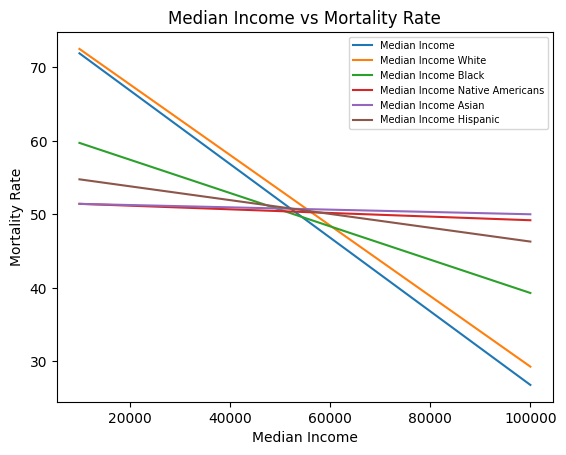

In [26]:
# Plot graph of Median Income vs Mortality Rate

li = []
for key,val in model_estimates.items():
    if ('Med_Income' in key or 'Hispanic' in key) and 'Mortality_Rate' in key:
        x = np.linspace(10000,100000)
        y = model_estimates[key][0][0]*x + model_estimates[key][0][1]
        plt.plot(x,y)
        data = key
        temp = data.split('_')
        temp = temp[:-2]
        data  = "_".join(temp)
        li.append(xcols[data])
plt.xlabel('Median Income')
plt.ylabel('Mortality Rate')
plt.legend(li,prop={'size': 7})
plt.title('Median Income vs Mortality Rate')
plt.savefig('Median Income vs Mortality Rate')
plt.show()

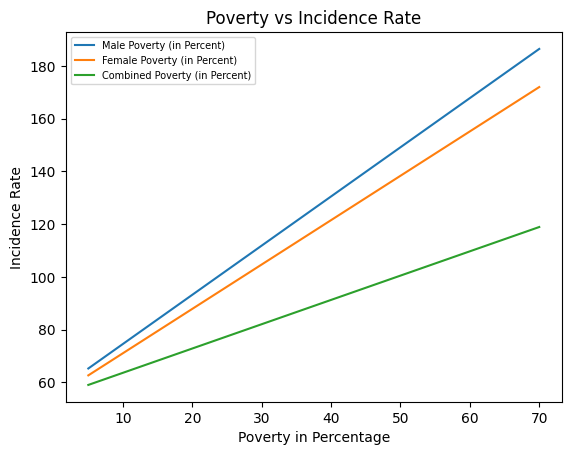

In [27]:
# Plot graph of Poverty vs Incidence Rate

li = []
for key,val in model_estimates.items():
    if 'Poverty' in key and 'Incidence_Rate' in key:
        x = np.linspace(5,70)
        y = model_estimates[key][0][0]*x + model_estimates[key][0][1]
        plt.plot(x,y)
        data = key
        temp = data.split('_')
        temp = temp[:-2]
        data  = "_".join(temp)
        li.append(xcols[data])
plt.xlabel('Poverty in Percentage')
plt.ylabel('Incidence Rate')
plt.legend(li,prop={'size': 7})
plt.title('Poverty vs Incidence Rate')
plt.savefig('Poverty vs Incidence Rate')
plt.show()

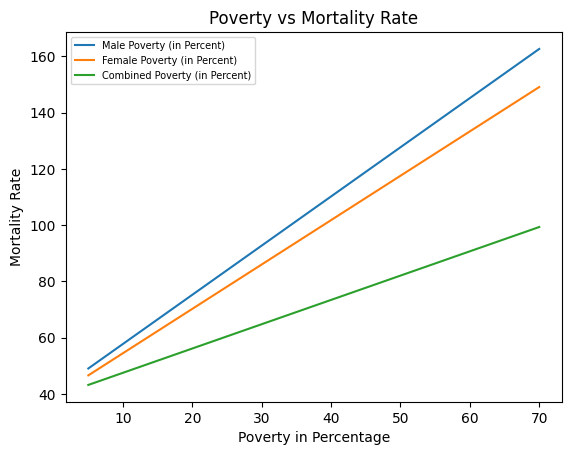

In [28]:
# Plot graph of Poverty vs Mortality Rate

li = []
for key,val in model_estimates.items():
    if 'Poverty' in key and 'Mortality_Rate' in key:
        x = np.linspace(5,70)
        y = model_estimates[key][0][0]*x + model_estimates[key][0][1]
        plt.plot(x,y)
        data = key
        temp = data.split('_')
        temp = temp[:-2]
        data  = "_".join(temp)
        li.append(xcols[data])
plt.xlabel('Poverty in Percentage')
plt.ylabel('Mortality Rate')
plt.legend(li,prop={'size': 7})
plt.title('Poverty vs Mortality Rate')
plt.savefig('Poverty vs Mortality Rate')
plt.show()

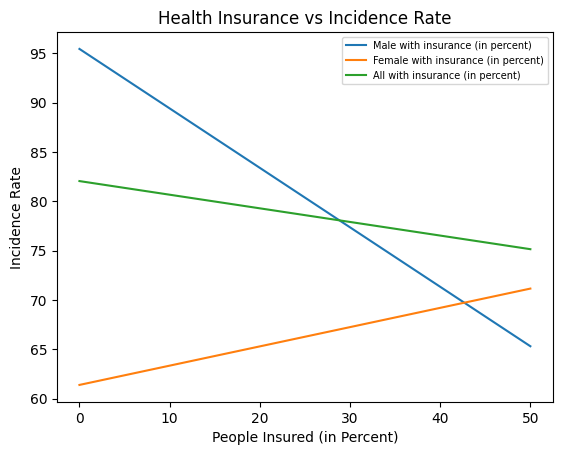

In [29]:
# Plot graph of Health Insurance vs Incidence Rate

li = []
for key,val in model_estimates.items():
    if 'With' in key and 'Incidence_Rate' in key:
        x = np.linspace(0,50)
        y = model_estimates[key][0][0]*x + model_estimates[key][0][1]
        plt.plot(x,y)
        data = key
        temp = data.split('_')
        temp = temp[:-2]
        data  = "_".join(temp)
        li.append(xcols[data])
plt.xlabel('People Insured (in Percent)')
plt.ylabel('Incidence Rate')
plt.legend(li,prop={'size': 7})
plt.title('Health Insurance vs Incidence Rate')
plt.savefig('Health Insurance vs Incidence Rate')
plt.show()

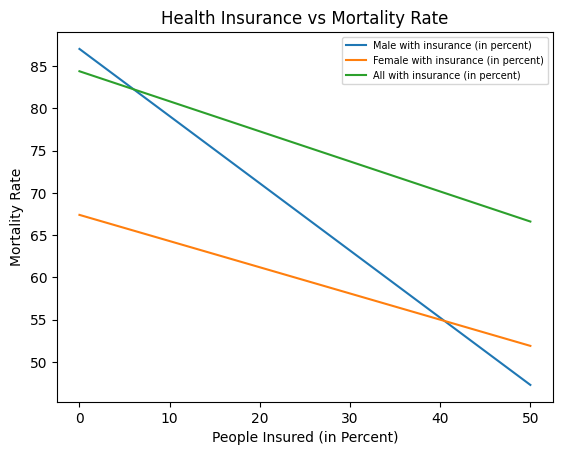

In [30]:
# Plot graph of Health Insurance vs Mortality Rate

li = []
for key,val in model_estimates.items():
    if 'With' in key and 'Mortality_Rate' in key:
        x = np.linspace(0,50)
        y = model_estimates[key][0][0]*x + model_estimates[key][0][1]
        plt.plot(x,y)
        data = key
        temp = data.split('_')
        temp = temp[:-2]
        data  = "_".join(temp)
        li.append(xcols[data])
plt.xlabel('People Insured (in Percent)')
plt.ylabel('Mortality Rate')
plt.legend(li,prop={'size': 7})
plt.title('Health Insurance vs Mortality Rate')
plt.savefig('Health Insurance vs Mortality Rate')
plt.show()

## Summarisation of all plots

In [31]:
final_dataset.columns

Index(['Med_Income', 'Med_Income_White', 'Med_Income_Black',
       'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic', 'Incidence_Rate',
       'Mortality_Rate', 'M_With_Percentage', 'F_With_Percentage',
       'All_With_Percentage', 'All_Poverty_Percentage', 'M_Poverty_Percentage',
       'F_Poverty_Percentage'],
      dtype='object')

In [32]:
X = final_dataset['All_Poverty_Percentage']
y = final_dataset['Incidence_Rate']

x = sm.add_constant(X)
result = sm.OLS(y,x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         Incidence_Rate   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     315.3
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           1.01e-66
Time:                        07:43:08   Log-Likelihood:                -11185.
No. Observations:                2641   AIC:                         2.237e+04
Df Residuals:                    2639   BIC:                         2.239e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     54

In [33]:
X = final_dataset['All_Poverty_Percentage']
y = final_dataset['Mortality_Rate']

x = sm.add_constant(X)
result = sm.OLS(y,x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         Mortality_Rate   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     454.5
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           3.48e-93
Time:                        07:43:08   Log-Likelihood:                -10528.
No. Observations:                2641   AIC:                         2.106e+04
Df Residuals:                    2639   BIC:                         2.107e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     38

In [34]:
X = final_dataset['Med_Income']
y = final_dataset['Incidence_Rate']

x = sm.add_constant(X)
result = sm.OLS(y,x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         Incidence_Rate   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     444.8
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           2.23e-91
Time:                        07:43:08   Log-Likelihood:                -11128.
No. Observations:                2641   AIC:                         2.226e+04
Df Residuals:                    2639   BIC:                         2.227e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.0277      1.224     77.620      0.0

In [35]:
X = final_dataset['Med_Income']
y = final_dataset['Mortality_Rate']

x = sm.add_constant(X)
result = sm.OLS(y,x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         Mortality_Rate   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     652.2
Date:                Fri, 01 Sep 2023   Prob (F-statistic):          9.67e-129
Time:                        07:43:10   Log-Likelihood:                -10447.
No. Observations:                2641   AIC:                         2.090e+04
Df Residuals:                    2639   BIC:                         2.091e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         76.9137      0.946     81.318      0.0

In [36]:
# note the pval here. Link to the conclusion held before
X = final_dataset['All_With_Percentage']
y = final_dataset['Incidence_Rate']

x = sm.add_constant(X)
result = sm.OLS(y,x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         Incidence_Rate   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.903
Date:                Fri, 01 Sep 2023   Prob (F-statistic):             0.0483
Time:                        07:43:10   Log-Likelihood:                -11332.
No. Observations:                2641   AIC:                         2.267e+04
Df Residuals:                    2639   BIC:                         2.268e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  82.0435    

In [37]:
X = final_dataset['All_With_Percentage']
y = final_dataset['Mortality_Rate']

x = sm.add_constant(X)
result = sm.OLS(y,x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         Mortality_Rate   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     41.26
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           1.57e-10
Time:                        07:43:11   Log-Likelihood:                -10718.
No. Observations:                2641   AIC:                         2.144e+04
Df Residuals:                    2639   BIC:                         2.145e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  84.3786    

In [38]:
final_dataset.columns

Index(['Med_Income', 'Med_Income_White', 'Med_Income_Black',
       'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic', 'Incidence_Rate',
       'Mortality_Rate', 'M_With_Percentage', 'F_With_Percentage',
       'All_With_Percentage', 'All_Poverty_Percentage', 'M_Poverty_Percentage',
       'F_Poverty_Percentage'],
      dtype='object')